In [52]:
import numpy as np
import pandas as pd
#import random
#seed = 2891  
#random.seed(seed)
#np.random.seed(seed)
from matplotlib import pyplot as plt

In [2]:
# Train.csv has the Field_IDs needed to find the npy files
train_new = pd.read_csv('Train_Cgiar.csv')
print(train_new.shape)
train_new.head()

(2977, 4)


,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


In [3]:
train_new['Quality'].value_counts()

3    1321
2    1231
1     425
Name: Quality, dtype: int64

In [4]:
train_new['Year'].value_counts()

2017    1203
2016    1024
2019     569
2018     181
Name: Year, dtype: int64

In [87]:
ss = pd.read_csv('SampleSubmission_Cgiar.csv')
ss.head()

,Field_ID,Yield
0,E9UZCEA,0
1,1WGGS1Q,0
2,EG2KXE2,0
3,HC3GQXF,0
4,7AK6GFK,0


Loading image_arrays_train/8AZ490K.npy as an array
Array shape: (360, 41, 40)


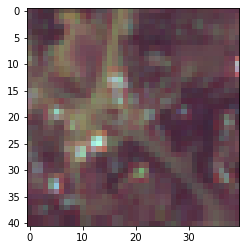

In [6]:
# Look at a sample:
fid = train_new['Field_ID'].sample().values[0]
fn = f'image_arrays_train/{fid}.npy' # File name based on Field_ID
print(f'Loading {fn} as an array')
arr = np.load(fn) # Loading the data with numpy
print('Array shape:', arr.shape) # 360 bands, images 40 or 41px a side
rgb_jan = np.stack([arr[4], arr[3], arr[2]], axis=-1) # Combine three bands for viewing
rgb_jan = rgb_jan / np.max(rgb_jan) # Scale band values to (0, 1) for easy image display
plt.imshow(rgb_jan) # View with matplotlib

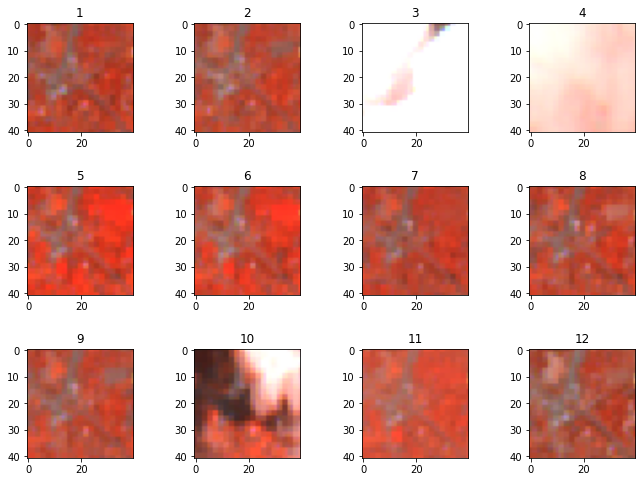

In [7]:
# View false colour images from each month in the year:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  rgb = np.stack([arr[i*30 + 8], arr[i*30 + 4], arr[i*30 + 3]], axis=-1) # False colour (band 8, 4 and 3)
  rgb = rgb / 4000 # Scaling consistently 
  axs[i].imshow(rgb.clip(0, 1))
  axs[i].set_title(str(i+1))

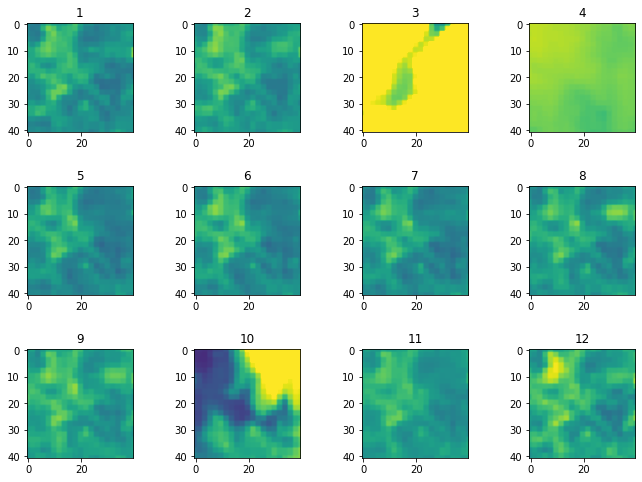

In [8]:
# Show the SWIR band (B12) where clouds have a high reflectance
fig, axs = plt.subplots(3, 4, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(12):
  cloud = arr[i*30 + 11]
  axs[i].imshow(cloud, vmin=0, vmax=4000)
  axs[i].set_title(str(i+1))

In [9]:
band_names = [l.strip() for l in open('bandnames.txt', 'r').readlines()]
print(band_names)

['0_S2_B1', '0_S2_B2', '0_S2_B3', '0_S2_B4', '0_S2_B5', '0_S2_B6', '0_S2_B7', '0_S2_B8', '0_S2_B8A', '0_S2_B9', '0_S2_B10', '0_S2_B11', '0_S2_B12', '0_S2_QA10', '0_S2_QA20', '0_S2_QA60', '0_CLIM_aet', '0_CLIM_def', '0_CLIM_pdsi', '0_CLIM_pet', '0_CLIM_pr', '0_CLIM_ro', '0_CLIM_soil', '0_CLIM_srad', '0_CLIM_swe', '0_CLIM_tmmn', '0_CLIM_tmmx', '0_CLIM_vap', '0_CLIM_vpd', '0_CLIM_vs', '1_S2_B1', '1_S2_B2', '1_S2_B3', '1_S2_B4', '1_S2_B5', '1_S2_B6', '1_S2_B7', '1_S2_B8', '1_S2_B8A', '1_S2_B9', '1_S2_B10', '1_S2_B11', '1_S2_B12', '1_S2_QA10', '1_S2_QA20', '1_S2_QA60', '1_CLIM_aet', '1_CLIM_def', '1_CLIM_pdsi', '1_CLIM_pet', '1_CLIM_pr', '1_CLIM_ro', '1_CLIM_soil', '1_CLIM_srad', '1_CLIM_swe', '1_CLIM_tmmn', '1_CLIM_tmmx', '1_CLIM_vap', '1_CLIM_vpd', '1_CLIM_vs', '2_S2_B1', '2_S2_B2', '2_S2_B3', '2_S2_B4', '2_S2_B5', '2_S2_B6', '2_S2_B7', '2_S2_B8', '2_S2_B8A', '2_S2_B9', '2_S2_B10', '2_S2_B11', '2_S2_B12', '2_S2_QA10', '2_S2_QA20', '2_S2_QA60', '2_CLIM_aet', '2_CLIM_def', '2_CLIM_pdsi', '2

In [10]:
def process_im(fid, folder='image_arrays_train'):
  fn = f'{folder}/{fid}.npy'
  arr = np.load(fn)
  bands_of_interest = ['S2_B5', 'S2_B4', 'S2_B3', 'S2_B2', 'CLIM_pr', 'CLIM_soil']
  
  values = {}
  for month in range(12):
    bns = [str(month) + '_' + b for b in bands_of_interest] # Bands of interest for this month 
    idxs = np.where(np.isin(band_names, bns)) # Index of these bands
    vs = arr[idxs, 20, 20] # Sample the im at the center point
    for bn, v in zip(bns, vs[0]):
      values[bn] = v
  return values

# Example
# process_im('35AFSDD')

In [11]:
# Make a new DF with the sampled values from each field 
train_sampled = pd.DataFrame([process_im(fid) for fid in train_new['Field_ID'].values])

# Add in the field ID and yield
train_sampled['Field_ID'] = train_new['Field_ID'].values
train_sampled['Yield'] = train_new['Yield'].values
train_sampled.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Field_ID,Yield
0,934,932,1173,1392,4,287,1015,1036,1397,1516,...,83,93,744,699,393,790,125,215,MH2O0YH,3.686
1,880,821,924,1116,4,287,933,873,1011,1152,...,78,96,703,524,323,420,126,215,O9TURWL,5.657
2,1016,1070,1357,1632,4,278,1108,1193,1588,1947,...,75,93,2935,2961,3598,4145,135,289,35AFSDD,3.082
3,777,784,639,1064,3,299,832,875,823,1237,...,86,95,7289,7389,8025,8057,121,189,PM05EG9,2.707
4,1081,1122,1162,1487,20,427,1046,1063,1133,1454,...,122,1123,1054,1097,789,1349,194,1214,V7PZBCG,2.679


In [12]:
train_sampled.to_csv("train_df.csv", index = False) # Saving train dataset

In [13]:
train_sampled = pd.read_csv("train_df.csv") # Reading back train dataset

In [14]:
# Prep the data, using the same method we did for train
test_sampled = pd.DataFrame([process_im(fid, folder='image_arrays_test') for fid in ss['Field_ID'].values])
test_sampled.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil
0,920,987,781,1252,32,326,958,991,1198,1361,...,555,934,124,435,922,944,697,1121,157,618
1,899,928,696,1129,32,326,970,972,1001,1265,...,643,1214,124,435,900,879,629,1034,157,618
2,966,1019,960,1299,32,316,874,778,861,1015,...,573,922,124,448,890,872,593,962,153,583
3,923,1032,672,1191,32,316,1066,1107,930,1271,...,823,1265,124,448,998,1099,736,1165,153,583
4,987,1047,1343,1441,32,316,949,991,1262,1273,...,879,1162,124,448,893,921,574,986,153,583


In [15]:
test_sampled.to_csv("test_df.csv", index = False) # Saving test dataset

In [16]:
test_sampled1 = pd.read_csv("test_df.csv") # Reading back test dataset
test_sampled1.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil
0,920,987,781,1252,32,326,958,991,1198,1361,...,555,934,124,435,922,944,697,1121,157,618
1,899,928,696,1129,32,326,970,972,1001,1265,...,643,1214,124,435,900,879,629,1034,157,618
2,966,1019,960,1299,32,316,874,778,861,1015,...,573,922,124,448,890,872,593,962,153,583
3,923,1032,672,1191,32,316,1066,1107,930,1271,...,823,1265,124,448,998,1099,736,1165,153,583
4,987,1047,1343,1441,32,316,949,991,1262,1273,...,879,1162,124,448,893,921,574,986,153,583


In [17]:
train_sampled.shape, test_sampled1.shape, ss.shape

((2977, 74), (1055, 72), (1055, 2))

In [18]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv('train_df.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)

test = pd.read_csv('test_df.csv')
test = test.select_dtypes(exclude=['object'])

print("")
print("List of features contained our dataset:",list(train.columns))

Shape of the train data with all features: (2977, 74)

Shape of the train data with numerical features: (2977, 73)

List of features contained our dataset: ['0_S2_B5', '0_S2_B4', '0_S2_B3', '0_S2_B2', '0_CLIM_pr', '0_CLIM_soil', '1_S2_B5', '1_S2_B4', '1_S2_B3', '1_S2_B2', '1_CLIM_pr', '1_CLIM_soil', '2_S2_B5', '2_S2_B4', '2_S2_B3', '2_S2_B2', '2_CLIM_pr', '2_CLIM_soil', '3_S2_B5', '3_S2_B4', '3_S2_B3', '3_S2_B2', '3_CLIM_pr', '3_CLIM_soil', '4_S2_B5', '4_S2_B4', '4_S2_B3', '4_S2_B2', '4_CLIM_pr', '4_CLIM_soil', '5_S2_B5', '5_S2_B4', '5_S2_B3', '5_S2_B2', '5_CLIM_pr', '5_CLIM_soil', '6_S2_B5', '6_S2_B4', '6_S2_B3', '6_S2_B2', '6_CLIM_pr', '6_CLIM_soil', '7_S2_B5', '7_S2_B4', '7_S2_B3', '7_S2_B2', '7_CLIM_pr', '7_CLIM_soil', '8_S2_B5', '8_S2_B4', '8_S2_B3', '8_S2_B2', '8_CLIM_pr', '8_CLIM_soil', '9_S2_B5', '9_S2_B4', '9_S2_B3', '9_S2_B2', '9_CLIM_pr', '9_CLIM_soil', '10_S2_B5', '10_S2_B4', '10_S2_B3', '10_S2_B2', '10_CLIM_pr', '10_CLIM_soil', '11_S2_B5', '11_S2_B4', '11_S2_B3', '11_S2_B2

In [19]:
train.shape, test.shape

((2977, 73), (1055, 72))

In [20]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 216
Number of rows without outliers: 2761


In [21]:
train.head(10)

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Yield
0,934,932,1173,1392,4,287,1015,1036,1397,1516,...,1162,83,93,744,699,393,790,125,215,3.686
1,880,821,924,1116,4,287,933,873,1011,1152,...,1037,78,96,703,524,323,420,126,215,5.657
2,1081,1122,1162,1487,20,427,1046,1063,1133,1454,...,1050,122,1123,1054,1097,789,1349,194,1214,2.679
3,945,949,921,1365,18,425,1036,1116,1520,1676,...,3422,109,1048,1000,1017,789,1213,196,1252,4.317
4,963,945,958,1299,18,425,1010,1084,1446,1645,...,4270,109,1048,818,635,393,540,196,1252,2.999
5,1043,1088,1100,1316,20,427,1122,1179,1511,1575,...,1503,122,1123,987,1070,715,1262,194,1214,4.199
6,1366,1268,1379,1552,19,431,1765,1545,1777,1608,...,1226,112,1073,1377,1640,1456,1813,193,1242,3.505
7,1044,1054,1151,1331,17,423,1069,1126,1331,1580,...,1341,104,788,2763,2630,2594,2827,185,1257,5.039
8,1146,1190,1351,1571,20,421,1027,1055,1133,1484,...,1300,126,1071,1141,1258,1132,1586,192,1193,2.520
9,1009,1002,1049,1353,17,423,1001,997,1177,1381,...,1195,104,788,2389,2293,2235,2463,185,1257,3.172


In [24]:
train.shape

(2761, 73)

In [25]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('Yield')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('Yield',axis = 1))
mat_y = np.array(train.Yield).reshape((2761,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)
train.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Yield
0,0.284958,0.355693,0.432061,0.484469,0.026667,0.167057,0.043888,0.067266,0.113033,0.123304,...,0.098785,0.177143,0.029638,0.014588,0.032287,0.014179,0.056242,0.394137,0.097093,0.255087
1,0.227754,0.257723,0.305344,0.346192,0.026667,0.167057,0.033146,0.046924,0.069962,0.083479,...,0.082622,0.162857,0.031284,0.009200,0.009504,0.005908,0.013512,0.397394,0.097093,0.391488
2,0.440678,0.523389,0.426463,0.532064,0.133333,0.276347,0.047950,0.070635,0.083575,0.116521,...,0.084303,0.288571,0.594951,0.055329,0.084104,0.060971,0.120799,0.618893,0.645091,0.185398
3,0.296610,0.370697,0.303817,0.470942,0.120000,0.274785,0.046640,0.077249,0.126757,0.140810,...,0.391001,0.251429,0.553787,0.048232,0.073688,0.060971,0.105093,0.625407,0.665935,0.298754
4,0.315678,0.367167,0.322646,0.437876,0.120000,0.274785,0.043233,0.073256,0.118500,0.137418,...,0.500646,0.251429,0.553787,0.024313,0.023955,0.014179,0.027370,0.625407,0.665935,0.207543


In [83]:
test.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil
0,0.270127,0.404237,0.232570,0.414329,0.213333,0.197502,0.036421,0.061650,0.090828,0.106346,...,0.028481,0.069304,0.294286,0.217344,0.037981,0.064184,0.050100,0.094468,0.498371,0.318157
1,0.247881,0.352162,0.189313,0.352705,0.213333,0.197502,0.037993,0.059279,0.068846,0.095842,...,0.039572,0.105508,0.294286,0.217344,0.035090,0.055722,0.042065,0.084421,0.498371,0.318157
2,0.318856,0.432480,0.323664,0.437876,0.213333,0.189696,0.025416,0.035068,0.053225,0.068490,...,0.030750,0.067753,0.294286,0.224479,0.033776,0.054811,0.037812,0.076106,0.485342,0.298958
3,0.273305,0.443954,0.177099,0.383768,0.213333,0.189696,0.050570,0.076126,0.060924,0.096499,...,0.062256,0.112102,0.294286,0.224479,0.047970,0.084364,0.054709,0.099550,0.485342,0.298958
4,0.341102,0.457193,0.518575,0.509018,0.213333,0.189696,0.035242,0.061650,0.097969,0.096718,...,0.069313,0.098785,0.294286,0.224479,0.034170,0.061190,0.035567,0.078877,0.485342,0.298958


In [ ]:
train_sampled.shape, test_sampled1.shape, ss.shape

In [ ]:
train.shape, test.shape

In [ ]:
train.head(10)

Score: 0.10516607396653088


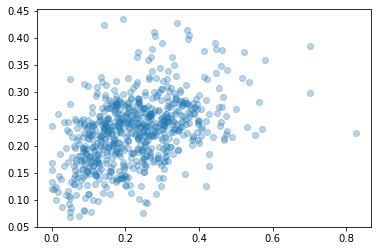

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data
X, y  = train[train.columns[:-1]], train['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Score with RMSE
print('Score:', mean_squared_error(y_test, model.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

In [78]:
def rmse(x, y): return np.sqrt(((x-y)**2).mean())

In [79]:
def print_score(model, X_train, y_train,X_test, y_test):
  r = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_test), y_test),model.score(X_train, y_train),model.score(X_test,y_test)]
  #if hasattr(model, "oob_score"):r.append(model.oob_score)
  print(r)

In [80]:
print_score(model, X_train, y_train,X_test, y_test)

[0.042854310110446436, 0.10516607396653092, 0.8721773873143466, 0.19044532565574568]


In [71]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
40,6_CLIM_pr,0.142015
22,3_CLIM_pr,0.030144
46,7_CLIM_pr,0.028330
27,4_S2_B2,0.026078
34,5_CLIM_pr,0.023058
...,...,...
11,1_CLIM_soil,0.004134
47,7_CLIM_soil,0.003538
17,2_CLIM_soil,0.002900
35,5_CLIM_soil,0.002737


In [27]:
test_sampled.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil
0,920,987,781,1252,32,326,958,991,1198,1361,...,555,934,124,435,922,944,697,1121,157,618
1,899,928,696,1129,32,326,970,972,1001,1265,...,643,1214,124,435,900,879,629,1034,157,618
2,966,1019,960,1299,32,316,874,778,861,1015,...,573,922,124,448,890,872,593,962,153,583
3,923,1032,672,1191,32,316,1066,1107,930,1271,...,823,1265,124,448,998,1099,736,1165,153,583
4,987,1047,1343,1441,32,316,949,991,1262,1273,...,879,1162,124,448,893,921,574,986,153,583


In [28]:
# Get model predictions
pred = model.predict(test_sampled1)

# Store them in the submission dataframe and save
ss['Yield'] = pred
#ss.to_csv('Submission_6.csv', index=False)
ss.head()

,Field_ID,Yield
0,E9UZCEA,3.564935
1,1WGGS1Q,3.271807
2,EG2KXE2,3.761860
3,HC3GQXF,3.571395
4,7AK6GFK,3.755530


In [34]:
train.columns

Index(['0_S2_B5', '0_S2_B4', '0_S2_B3', '0_S2_B2', '0_CLIM_pr', '0_CLIM_soil',
       '1_S2_B5', '1_S2_B4', '1_S2_B3', '1_S2_B2', '1_CLIM_pr', '1_CLIM_soil',
       '2_S2_B5', '2_S2_B4', '2_S2_B3', '2_S2_B2', '2_CLIM_pr', '2_CLIM_soil',
       '3_S2_B5', '3_S2_B4', '3_S2_B3', '3_S2_B2', '3_CLIM_pr', '3_CLIM_soil',
       '4_S2_B5', '4_S2_B4', '4_S2_B3', '4_S2_B2', '4_CLIM_pr', '4_CLIM_soil',
       '5_S2_B5', '5_S2_B4', '5_S2_B3', '5_S2_B2', '5_CLIM_pr', '5_CLIM_soil',
       '6_S2_B5', '6_S2_B4', '6_S2_B3', '6_S2_B2', '6_CLIM_pr', '6_CLIM_soil',
       '7_S2_B5', '7_S2_B4', '7_S2_B3', '7_S2_B2', '7_CLIM_pr', '7_CLIM_soil',
       '8_S2_B5', '8_S2_B4', '8_S2_B3', '8_S2_B2', '8_CLIM_pr', '8_CLIM_soil',
       '9_S2_B5', '9_S2_B4', '9_S2_B3', '9_S2_B2', '9_CLIM_pr', '9_CLIM_soil',
       '10_S2_B5', '10_S2_B4', '10_S2_B3', '10_S2_B2', '10_CLIM_pr',
       '10_CLIM_soil', '11_S2_B5', '11_S2_B4', '11_S2_B3', '11_S2_B2',
       '11_CLIM_pr', '11_CLIM_soil', 'Yield'],
      dtype='object')

In [35]:
x_cols=['0_S2_B5', '0_S2_B4', '0_S2_B3', '0_S2_B2', '0_CLIM_pr', '0_CLIM_soil',
       '1_S2_B5', '1_S2_B4', '1_S2_B3', '1_S2_B2', '1_CLIM_pr', '1_CLIM_soil',
       '2_S2_B5', '2_S2_B4', '2_S2_B3', '2_S2_B2', '2_CLIM_pr', '2_CLIM_soil',
       '3_S2_B5', '3_S2_B4', '3_S2_B3', '3_S2_B2', '3_CLIM_pr', '3_CLIM_soil',
       '4_S2_B5', '4_S2_B4', '4_S2_B3', '4_S2_B2', '4_CLIM_pr', '4_CLIM_soil',
       '5_S2_B5', '5_S2_B4', '5_S2_B3', '5_S2_B2', '5_CLIM_pr', '5_CLIM_soil',
       '6_S2_B5', '6_S2_B4', '6_S2_B3', '6_S2_B2', '6_CLIM_pr', '6_CLIM_soil',
       '7_S2_B5', '7_S2_B4', '7_S2_B3', '7_S2_B2', '7_CLIM_pr', '7_CLIM_soil',
       '8_S2_B5', '8_S2_B4', '8_S2_B3', '8_S2_B2', '8_CLIM_pr', '8_CLIM_soil',
       '9_S2_B5', '9_S2_B4', '9_S2_B3', '9_S2_B2', '9_CLIM_pr', '9_CLIM_soil',
       '10_S2_B5', '10_S2_B4', '10_S2_B3', '10_S2_B2', '10_CLIM_pr',
       '10_CLIM_soil', '11_S2_B5', '11_S2_B4', '11_S2_B3', '11_S2_B2',
       '11_CLIM_pr', '11_CLIM_soil']

In [44]:
#from fastai.tabular.import *
from fastai.tabular import *

In [45]:
dep_var = 'Yield'
#cat_names = cat_cols
cont_names = x_cols
#cont_names = [x for x in x_cols if x not in cat_cols]
procs = [FillMissing, Categorify, Normalize]

In [47]:
test = Tabular.from_df(test, cont_names=cont_names)

AttributeError: type object 'Tabular' has no attribute 'from_df'

In [50]:
from pathlib import Path

In [51]:
#set path to the train data
dir_to_scan='C:/Users/HP i3/train_df.csv'
pth = Path(dir_to_scan)

In [ ]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [66]:
TabularDataLoaders??

In [72]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train))

In [108]:
dls = TabularDataLoaders.from_csv('train_df.csv',  y_names="Yield",shuffle_train=False,

 cont_names = x_cols,
 procs = [Categorify, FillMissing, Normalize],splits=splits)


In [109]:
dls.show_batch()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,1_CLIM_pr,1_CLIM_soil,2_S2_B5,2_S2_B4,2_S2_B3,2_S2_B2,2_CLIM_pr,2_CLIM_soil,3_S2_B5,3_S2_B4,3_S2_B3,3_S2_B2,3_CLIM_pr,3_CLIM_soil,4_S2_B5,4_S2_B4,4_S2_B3,4_S2_B2,4_CLIM_pr,4_CLIM_soil,5_S2_B5,5_S2_B4,5_S2_B3,5_S2_B2,5_CLIM_pr,5_CLIM_soil,6_S2_B5,6_S2_B4,6_S2_B3,6_S2_B2,6_CLIM_pr,6_CLIM_soil,7_S2_B5,7_S2_B4,7_S2_B3,7_S2_B2,7_CLIM_pr,7_CLIM_soil,8_S2_B5,8_S2_B4,8_S2_B3,8_S2_B2,8_CLIM_pr,8_CLIM_soil,9_S2_B5,9_S2_B4,9_S2_B3,9_S2_B2,9_CLIM_pr,9_CLIM_soil,10_S2_B5,10_S2_B4,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Yield
0,1243.0,1358.0,1781.0,1841.0,27.0,177.999969,1639.000000,1544.0,1555.000000,1663.0,131.000000,145.0,1243.000000,1401.000000,1784.000000,1931.000000,166.000000,208.000000,1241.0,1452.0,1772.0,1864.0,183.000000,574.000000,1325.0,1537.0,1831.000000,1848.0,75.0,344.999969,1212.000000,1323.000000,1619.0,1692.0,43.0,231.999985,1224.0,1304.000000,1552.000000,1649.0,15.999998,178.0,1233.0,1319.000000,1659.000000,1674.0,61.000000,145.000000,1189.000000,1272.0,1517.000000,1598.0,113.0,126.0,1262.0,1420.000000,1664.000000,1679.0,84.0,109.000000,1260.000000,1401.0,1637.000000,1710.0,135.0,189.000015,1149.0,1318.0,1597.0,1671.0,58.000000,152.000015,3.65000
1,906.0,920.0,878.0,1347.0,89.0,965.000000,957.000061,966.0,1015.000061,1353.0,24.999996,442.0,829.999878,663.000000,599.000061,648.000000,46.000000,309.000000,1218.0,1107.0,988.0,1296.0,329.000000,1234.000000,802.0,838.0,490.000000,937.0,125.0,1234.000000,853.999939,919.999939,644.0,1123.0,43.0,777.000000,981.0,965.000061,693.000000,1145.0,41.000000,422.0,844.0,851.999939,615.000000,1044.0,111.000000,358.000000,1118.000000,1140.0,989.999939,1476.0,83.0,268.0,1009.0,1058.000000,1071.000000,1504.0,76.0,216.000000,1182.000000,1225.0,1176.000000,1593.0,106.0,181.000015,995.0,1016.0,1192.0,1397.0,21.999996,156.000000,2.05600
2,1008.0,1043.0,1097.0,1201.0,109.0,980.000000,1018.000061,1024.0,1203.000000,1287.0,29.999998,428.0,1330.000000,1372.000000,1525.000000,1629.000000,52.999996,298.000000,1429.0,1411.0,1268.0,1530.0,369.000000,1182.000000,1209.0,1091.0,952.000000,1127.0,131.0,1182.000000,896.999939,952.999939,770.0,1148.0,39.0,690.000000,1057.0,1025.000000,841.000000,1176.0,33.000000,385.0,888.0,893.999939,678.000000,1046.0,96.000000,281.000000,964.999939,994.0,901.999939,1203.0,85.0,221.0,1516.0,1469.000000,1451.000000,1797.0,91.0,184.000000,1082.000000,1061.0,1131.000000,1228.0,135.0,176.000015,1044.0,1071.0,1283.0,1399.0,24.999996,152.000015,4.82500
3,881.0,885.0,1156.0,1449.0,9.0,162.999985,872.000061,763.0,971.000061,1065.0,54.000000,145.0,809.999939,775.000000,1065.000000,1229.000000,69.000000,131.000000,803.0,766.0,819.0,1072.0,114.000008,119.999969,693.0,656.0,388.999969,712.0,88.0,110.000000,836.999939,791.999939,573.0,848.0,44.0,101.999969,852.0,836.000061,599.000000,891.0,84.000000,95.0,992.0,1041.000000,1011.000000,1320.0,105.000000,94.000015,893.000000,927.0,913.999939,1180.0,109.0,91.0,835.0,958.000061,822.000000,1243.0,83.0,86.000015,862.999939,929.0,845.000061,1207.0,85.0,81.000015,853.0,894.0,896.0,1253.0,6.999996,76.000000,7.49875
4,1073.0,1147.0,1388.0,1851.0,10.0,174.999985,1127.000000,1180.0,1420.000000,1696.0,95.000000,145.0,1339.999878,1603.000000,2184.000000,2254.000000,98.000000,124.000008,1334.0,1610.0,2102.0,2216.0,174.000000,299.999969,931.0,1031.0,789.000000,1239.0,77.0,216.999969,1000.999939,1072.000000,880.0,1237.0,25.0,170.999969,1008.0,1056.000000,909.000000,1328.0,19.999998,142.0,1170.0,1268.000000,1627.000000,1645.0,57.000004,122.000000,1046.000000,1122.0,1277.000000,1453.0,98.0,107.0,1051.0,1203.000000,1110.000000,1611.0,88.0,95.000015,1124.000000,1235.0,1285.000000,1464.0,149.0,242.000000,1052.0,1105.0,1098.0,1372.0,15.999996,186.000015,1.68750
5,907.0,929.0,780.0,1141.0,78.0,622.000000,1113.000000,1179.0,1397.000000,1589.0,24.000000,332.0,5324.000000,4778.000000,4669.000000,4478.000000,40.999996,

In [110]:
layers = [100]

In [111]:
learn = tabular_learner(dls,layers=layers, metrics=rmse)


In [ ]:
layers = [500]
metrics = [rmse]
y_min, y_max = 0.8*min(small_train[dep_var]), 1.2*max(small_train[dep_var])
y_range = (y_min, y_max)
ps = [0]
emb_drop = 0
wd = 1e-1

In [113]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,_rmse,time
0,2.545231,2.379336,1.542510,00:01


epoch,train_loss,valid_loss,_rmse,time
0,2.478513,2.317923,1.522473,00:01
1,2.460805,2.316070,1.521864,00:01
2,2.450753,2.313678,1.521078,00:01
3,2.441826,2.317929,1.522475,00:01
4,2.430465,2.323440,1.524283,00:01
5,2.413490,2.321790,1.523742,00:01
6,2.389281,2.318191,1.522561,00:01
7,2.360829,2.316336,1.521951,00:01
8,2.331371,2.312009,1.520529,00:01
9,2.301931,2.305868,1.518509,00:01


SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=7.585775847473997e-07)

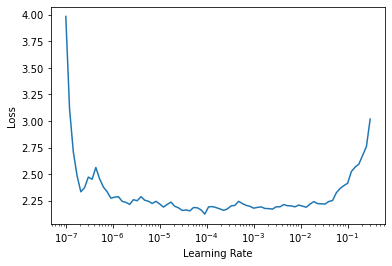

In [114]:
learn.lr_find()

In [128]:
learn.fine_tune(20, 9e-7)

epoch,train_loss,valid_loss,_rmse,time
0,1.546622,2.395703,1.547806,00:01


epoch,train_loss,valid_loss,_rmse,time
0,1.546607,2.395706,1.547807,00:01
1,1.546605,2.395707,1.547807,00:01
2,1.546604,2.395707,1.547807,00:01
3,1.546603,2.395709,1.547808,00:01
4,1.546602,2.395710,1.547808,00:01
5,1.546599,2.395713,1.547809,00:01
6,1.546594,2.395716,1.547810,00:01
7,1.546588,2.395719,1.547811,00:01
8,1.546581,2.395722,1.547812,00:01
9,1.546574,2.395724,1.547813,00:01


In [120]:
# Build a Classification Interpretation object from our learn model
interp = ClassificationInterpretation

In [118]:
learn.show_results(max_n=6,figsize=(7,8))

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,1_CLIM_pr,1_CLIM_soil,2_S2_B5,2_S2_B4,2_S2_B3,2_S2_B2,2_CLIM_pr,2_CLIM_soil,3_S2_B5,3_S2_B4,3_S2_B3,3_S2_B2,3_CLIM_pr,3_CLIM_soil,4_S2_B5,4_S2_B4,4_S2_B3,4_S2_B2,4_CLIM_pr,4_CLIM_soil,5_S2_B5,5_S2_B4,5_S2_B3,5_S2_B2,5_CLIM_pr,5_CLIM_soil,6_S2_B5,6_S2_B4,6_S2_B3,6_S2_B2,6_CLIM_pr,6_CLIM_soil,7_S2_B5,7_S2_B4,7_S2_B3,7_S2_B2,7_CLIM_pr,7_CLIM_soil,8_S2_B5,8_S2_B4,8_S2_B3,8_S2_B2,8_CLIM_pr,8_CLIM_soil,9_S2_B5,9_S2_B4,9_S2_B3,9_S2_B2,9_CLIM_pr,9_CLIM_soil,10_S2_B5,10_S2_B4,10_S2_B3,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Yield,Yield_pred
0,-0.114493,-0.428658,0.256161,0.390438,-0.970094,-0.806414,-0.011996,-0.102807,0.334539,0.130742,-0.094142,-0.747394,-0.434513,-0.508149,-0.498084,-0.514798,-0.081175,-0.552723,-0.597882,-0.698606,-0.499428,-0.706949,-1.310541,-1.144067,-0.440786,-0.355055,-0.539801,-0.423141,-0.686946,-1.133396,-0.395216,-0.340264,-0.492240,-0.495764,-0.284117,-0.962698,-0.443825,-0.413659,-0.562466,-0.477012,1.836193,-0.785104,0.136658,0.249530,0.123066,0.106018,0.525801,-0.251368,-0.417230,-0.381424,-0.515883,-0.427434,0.292062,-0.185123,-0.377285,-0.363053,-0.355080,-0.319097,-0.485773,-0.426106,-0.249965,-0.149030,0.022535,0.099957,-0.729529,-0.447536,-0.358221,-0.284042,-0.200087,-0.328335,-0.763691,-0.492043,3.13750,3.903577
1,-0.248122,-0.304141,0.067428,0.229333,-0.158688,-0.297389,-0.246521,-0.156431,0.033142,0.115913,-0.498070,-0.265043,-0.327309,-0.300721,-0.166121,-0.135483,-0.345566,-0.283648,-0.501764,-0.490431,-0.127965,-0.224127,-0.380331,-0.368812,2.780050,2.481618,2.234993,2.124511,0.365552,-0.017595,0.435940,0.424120,0.452535,0.409415,0.034643,-0.234852,-0.296327,-0.281343,-0.273265,-0.204490,-0.071536,-0.261692,-0.164152,-0.009042,-0.068433,0.006348,-0.104914,-0.304078,-0.239194,-0.183000,-0.050906,0.062158,-0.822064,-0.324607,-0.298356,-0.306518,-0.015790,-0.143195,0.971168,0.617217,-0.093537,-0.185138,-0.150158,-0.321465,0.079169,0.627556,0.666141,0.449089,0.422814,0.411338,1.644645,1.101036,1.31200,3.130853
2,-0.311754,-0.202263,-0.340976,0.203703,2.425789,0.284830,0.060302,0.261838,0.566999,0.453696,3.339241,4.320596,-0.328758,-0.265653,-0.295684,-0.295270,2.944636,6.530508,-0.457103,-0.408575,-0.461133,-0.472063,0.987625,1.281440,-0.242428,-0.129882,-0.053247,-0.059191,3.720390,1.195138,-0.186128,-0.102396,-0.104763,0.014590,4.178516,2.299132,-0.157504,-0.103662,-0.156022,-0.042161,2.592086,3.249372,-0.183848,-0.141040,-0.151626,-0.006941,4.533896,3.517410,-0.058597,0.128435,0.249961,0.111243,3.570775,3.851954,-0.355023,-0.324316,-0.417111,-0.403489,0.780540,2.079322,-0.376372,-0.291822,-0.419443,-0.282153,-1.249406,1.026035,-0.358221,-0.300155,-0.343738,-0.388238,1.690085,1.406778,2.98500,2.702970
3,1.495412,1.580597,1.812430,2.363977,-0.819833,-0.962782,0.123783,0.165314,0.422713,0.498185,0.511749,-1.005088,-0.127388,-0.048525,0.023673,0.227997,0.741376,-0.799982,-0.129914,-0.017489,0.259774,0.217540,-0.850908,-1.203005,-0.280860,-0.134914,-0.241911,-0.206171,-0.476447,-1.182939,-0.197816,-0.060970,-0.190869,-0.040001,-0.323962,-1.028594,-0.078178,0.017313,-0.010863,0.232732,0.108438,-0.857694,0.059665,0.182627,0.317704,0.529613,-0.288025,-0.703169,-0.129043,-0.059477,-0.142475,0.389391,0.355726,-0.635458,-0.207284,-0.123303,-0.173687,0.098797,-0.240680,-0.653652,-0.314749,-0.193345,-0.377002,-0.095029,-0.094123,-0.666834,-0.118945,-0.031608,0.066163,0.115729,-0.703104,-0.655259,3.86875,2.984939
4,-0.559922,-0.496577,-0.217217,-0.645761,1.494175,-0.353947,-0.184804,-0.170731,0.203078,-0.047212,3.047515,2.272256,-0.430167,-0.445473,-0.588428,-0.565182,3.003389,4.370631,-0.500793,-0.511652,-0.650694,-0.698919,0.549879,0.968618,-0.363922,-0.299705,-0.394166,-0.238833,4.088764,0.897879,-0.262750,-0.199949,-0.309265,-0.193614,4.178516,1.885787,-0.100488,-0.093581,-0.047711,-0.074153,2.268132,2.439421,-0.207125,-0.419501,-0.233248,-0.357445,3.577650,2.9978

In [121]:
interp.plot_top_losses(9, figsize=(15,11))

TypeError: plot_top_losses() missing 1 required positional argument: 'k'

In [124]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(learn,min_val=2)

AttributeError: 'TabularLearner' object has no attribute 'confusion_matrix'

In [125]:
# Save the model
learn.save('stage-1')

# Load the Model
learn.load('stage-1')

SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=7.585775892948732e-05)

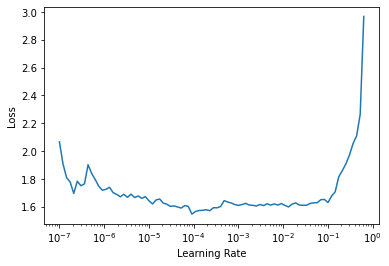

In [127]:
# Unfreeze all layers of the CNN
learn.unfreeze()

# Find the optimal learning rate and plot a visual
learn.lr_find()
#learn.recorder.plot(suggestion=True)

In [131]:
# Fit the model over 2 epochs
learn.fit_one_cycle(8, slice(9e-7, 3e-6))

epoch,train_loss,valid_loss,_rmse,time
0,1.546487,2.395739,1.547817,00:01
1,1.546509,2.395739,1.547817,00:01
2,1.546503,2.395760,1.547824,00:01
3,1.546470,2.395783,1.547832,00:01
4,1.546425,2.395804,1.547839,00:01
5,1.546379,2.395819,1.547843,00:01
6,1.546342,2.395826,1.547846,00:01
7,1.546320,2.395828,1.547846,00:01


In [27]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('Yield')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('Yield',axis = 1))
mat_y = np.array(train.Yield).reshape((2761,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)
train.head()

,0_S2_B5,0_S2_B4,0_S2_B3,0_S2_B2,0_CLIM_pr,0_CLIM_soil,1_S2_B5,1_S2_B4,1_S2_B3,1_S2_B2,...,10_S2_B2,10_CLIM_pr,10_CLIM_soil,11_S2_B5,11_S2_B4,11_S2_B3,11_S2_B2,11_CLIM_pr,11_CLIM_soil,Yield
0,0.284958,0.355693,0.432061,0.484469,0.026667,0.167057,0.043888,0.067266,0.113033,0.123304,...,0.098785,0.177143,0.029638,0.014588,0.032287,0.014179,0.056242,0.394137,0.097093,0.255087
1,0.227754,0.257723,0.305344,0.346192,0.026667,0.167057,0.033146,0.046924,0.069962,0.083479,...,0.082622,0.162857,0.031284,0.009200,0.009504,0.005908,0.013512,0.397394,0.097093,0.391488
2,0.440678,0.523389,0.426463,0.532064,0.133333,0.276347,0.047950,0.070635,0.083575,0.116521,...,0.084303,0.288571,0.594951,0.055329,0.084104,0.060971,0.120799,0.618893,0.645091,0.185398
3,0.296610,0.370697,0.303817,0.470942,0.120000,0.274785,0.046640,0.077249,0.126757,0.140810,...,0.391001,0.251429,0.553787,0.048232,0.073688,0.060971,0.105093,0.625407,0.665935,0.298754
4,0.315678,0.367167,0.322646,0.437876,0.120000,0.274785,0.043233,0.073256,0.118500,0.137418,...,0.500646,0.251429,0.553787,0.024313,0.023955,0.014179,0.027370,0.625407,0.665935,0.207543


In [85]:
# Get model predictions
predic = model.predict(test)

# Store them in the submission dataframe and save
ss['Yield'] = predic
#ss.to_csv('Submission_6.csv', index=False)
ss.head()

,Field_ID,Yield
0,E9UZCEA,0.229417
1,1WGGS1Q,0.224598
2,EG2KXE2,0.260381
3,HC3GQXF,0.218460
4,7AK6GFK,0.231716


In [91]:
subs = pd.read_csv('SampleSubmission_Cgiar.csv')
predics = model.predict(test)
subs['Yield'] = predics
subs.to_csv('Submission_9.csv', index=False)
subs.head()

,Field_ID,Yield
0,E9UZCEA,0.229417
1,1WGGS1Q,0.224598
2,EG2KXE2,0.260381
3,HC3GQXF,0.218460
4,7AK6GFK,0.231716
